In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [47]:
sneha_df = pd.read_excel("Biomass pyrolysis dataset.xlsx", sheet_name="Database")

In [48]:
sneha_df.shape

(345, 13)

In [49]:
sneha_df.head()

,Unnamed: 0,Biomass,Origin,Cellulose [%],Hemicellulose [%],Lignin [%],Type of reactor,Pyrolysis temperature [°C],Heating rate [°C/min],N2 flow rate [mL/min],Biomass particle size [mm],Bio-oil yield [%],Reference
0,NaN,Acacia mangium without bark1,"Pinar del Río, Cuba",48.44,23.93,27.18,fixed-beda,450.0,10.0,150.0,1600b,57.80,[1]
1,NaN,Acacia mangium with bark1,"Pinar del Río, Cuba",42.11,28.03,29.08,fixed-beda,450.0,10.0,150.0,1600b,56.38,[1]
2,NaN,Almond shell waste,"Extremadura, Spain",37.40,31.20,27.50,fixed-bed,800.0,5.0,200.0,1000b,51.50,[2]
3,NaN,Almond shell waste,"Extremadura, Spain",37.40,31.20,27.50,fixed-bed,800.0,10.0,200.0,1000b,50.80,[2]
4,NaN,Almond shell waste,"Extremadura, Spain",37.40,31.20,27.50,fixed-bed,800.0,15.0,200.0,1000b,50.50,[2]


In [50]:
sneha_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  0 non-null      float64
 1   Biomass                     345 non-null    object 
 2   Origin                      341 non-null    object 
 3   Cellulose [%]               341 non-null    float64
 4   Hemicellulose [%]           341 non-null    float64
 5   Lignin [%]                  341 non-null    float64
 6   Type of reactor             341 non-null    object 
 7   Pyrolysis temperature [°C]  341 non-null    float64
 8   Heating rate [°C/min]       341 non-null    float64
 9   N2 flow rate [mL/min]       341 non-null    float64
 10  Biomass particle size [mm]  341 non-null    object 
 11  Bio-oil yield [%]           341 non-null    object 
 12  Reference                   341 non-null    object 
dtypes: float64(7), object(6)
memory usa

In [51]:
sneha_df = sneha_df.loc[:, ~sneha_df.columns.str.contains('^Unnamed')]
sneha_df['Bio-oil yield [%]'] = sneha_df['Bio-oil yield [%]'].astype(str).str.replace('c', '', regex=False)
sneha_df['Bio-oil yield [%]'] = pd.to_numeric(sneha_df['Bio-oil yield [%]'], errors='coerce')
sneha_df['Biomass particle size [mm]'] = sneha_df['Biomass particle size [mm]'].astype(str).str.extract(r'(\d+)')
sneha_df['Biomass particle size [mm]'] = pd.to_numeric(sneha_df['Biomass particle size [mm]'], errors='coerce')
sneha_df['Type of reactor'] = sneha_df['Type of reactor'].astype(str).str.strip()
sneha_df = sneha_df.dropna(subset=['Bio-oil yield [%]'])

In [52]:
X = sneha_df.drop(columns=['Bio-oil yield [%]', 'Reference', 'Origin'])
y = sneha_df['Bio-oil yield [%]']

In [53]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [54]:
sneha_df.head()

,Biomass,Origin,Cellulose [%],Hemicellulose [%],Lignin [%],Type of reactor,Pyrolysis temperature [°C],Heating rate [°C/min],N2 flow rate [mL/min],Biomass particle size [mm],Bio-oil yield [%],Reference
0,Acacia mangium without bark1,"Pinar del Río, Cuba",48.44,23.93,27.18,fixed-beda,450.0,10.0,150.0,1600.0,57.80,[1]
1,Acacia mangium with bark1,"Pinar del Río, Cuba",42.11,28.03,29.08,fixed-beda,450.0,10.0,150.0,1600.0,56.38,[1]
2,Almond shell waste,"Extremadura, Spain",37.40,31.20,27.50,fixed-bed,800.0,5.0,200.0,1000.0,51.50,[2]
3,Almond shell waste,"Extremadura, Spain",37.40,31.20,27.50,fixed-bed,800.0,10.0,200.0,1000.0,50.80,[2]
4,Almond shell waste,"Extremadura, Spain",37.40,31.20,27.50,fixed-bed,800.0,15.0,200.0,1000.0,50.50,[2]


In [55]:
sneha_df.shape

(341, 12)

In [56]:
sneha_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 0 to 340
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Biomass                     341 non-null    object 
 1   Origin                      341 non-null    object 
 2   Cellulose [%]               341 non-null    float64
 3   Hemicellulose [%]           341 non-null    float64
 4   Lignin [%]                  341 non-null    float64
 5   Type of reactor             341 non-null    object 
 6   Pyrolysis temperature [°C]  341 non-null    float64
 7   Heating rate [°C/min]       341 non-null    float64
 8   N2 flow rate [mL/min]       341 non-null    float64
 9   Biomass particle size [mm]  341 non-null    float64
 10  Bio-oil yield [%]           341 non-null    float64
 11  Reference                   341 non-null    object 
dtypes: float64(8), object(4)
memory usage: 34.6+ KB


In [57]:
sneha_df.isnull().sum()

Biomass                       0
Origin                        0
Cellulose [%]                 0
Hemicellulose [%]             0
Lignin [%]                    0
Type of reactor               0
Pyrolysis temperature [°C]    0
Heating rate [°C/min]         0
N2 flow rate [mL/min]         0
Biomass particle size [mm]    0
Bio-oil yield [%]             0
Reference                     0
dtype: int64

In [58]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])


In [59]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Cellulose [%]',
                                                   'Hemicellulose [%]',
                                                   'Lignin [%]',
                                                   'Pyrolysis temperature [°C]',
                                                   'Heating rate [°C/min]',
                                                   'N2 flow rate [mL/min]',
                                                   'Biomass particle size '
                                                   '[mm]']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Biomass',
                                                   'Type of reactor'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [61]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [62]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("\nTop Features:")
print(feature_importance_df.head(10))

MAE: 2.15567391304348
MSE: 13.804781511078883
RMSE: 3.7154786382213105

Top Features:
                                          Feature  Importance
4                           Heating rate [°C/min]    0.178508
1                               Hemicellulose [%]    0.171743
6                      Biomass particle size [mm]    0.098715
17      Biomass_Hornbeam (Carpinus betulus) shell    0.097456
39  Biomass_Safflower (Carthamus tinctorius) seed    0.079048
2                                      Lignin [%]    0.076799
3                      Pyrolysis temperature [°C]    0.067256
5                           N2 flow rate [mL/min]    0.066260
0                                   Cellulose [%]    0.044804
30          Biomass_Paulownia wood (P. tomentose)    0.014894


In [63]:
feature_names = (
    model.named_steps['preprocessor'].transformers_[0][2] +
    list(model.named_steps['preprocessor'].transformers_[1][1]
         .named_steps['onehot'].get_feature_names_out(categorical_cols))
)
importances = model.named_steps['regressor'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

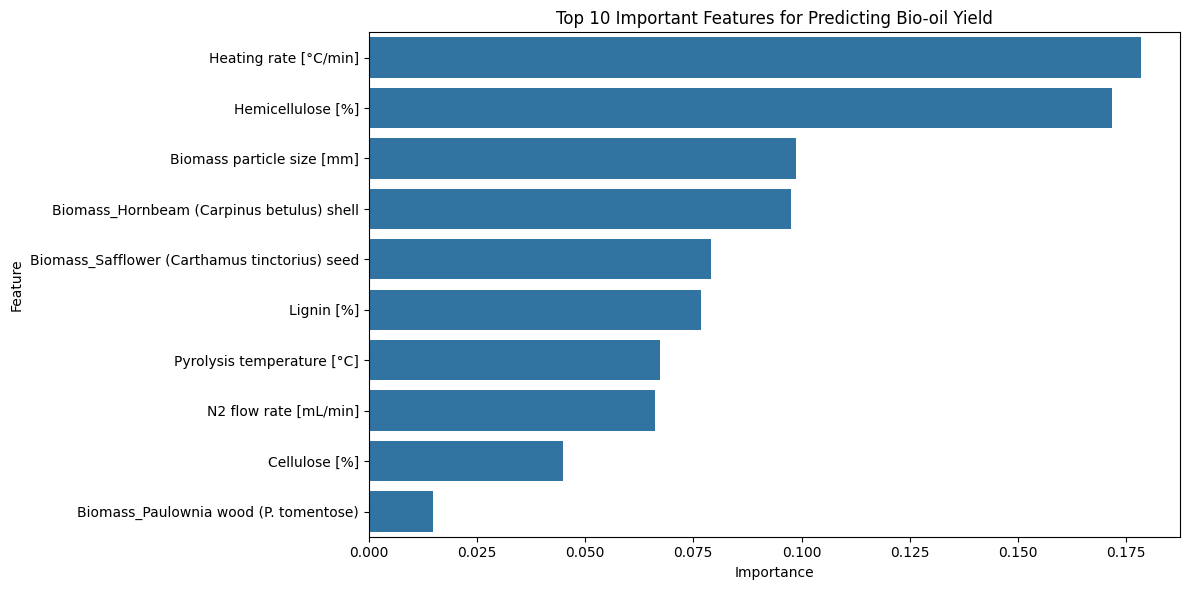

In [64]:
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_df.head(10), x="Importance", y="Feature")
plt.title("Top 10 Important Features for Predicting Bio-oil Yield")
plt.tight_layout()
plt.show()


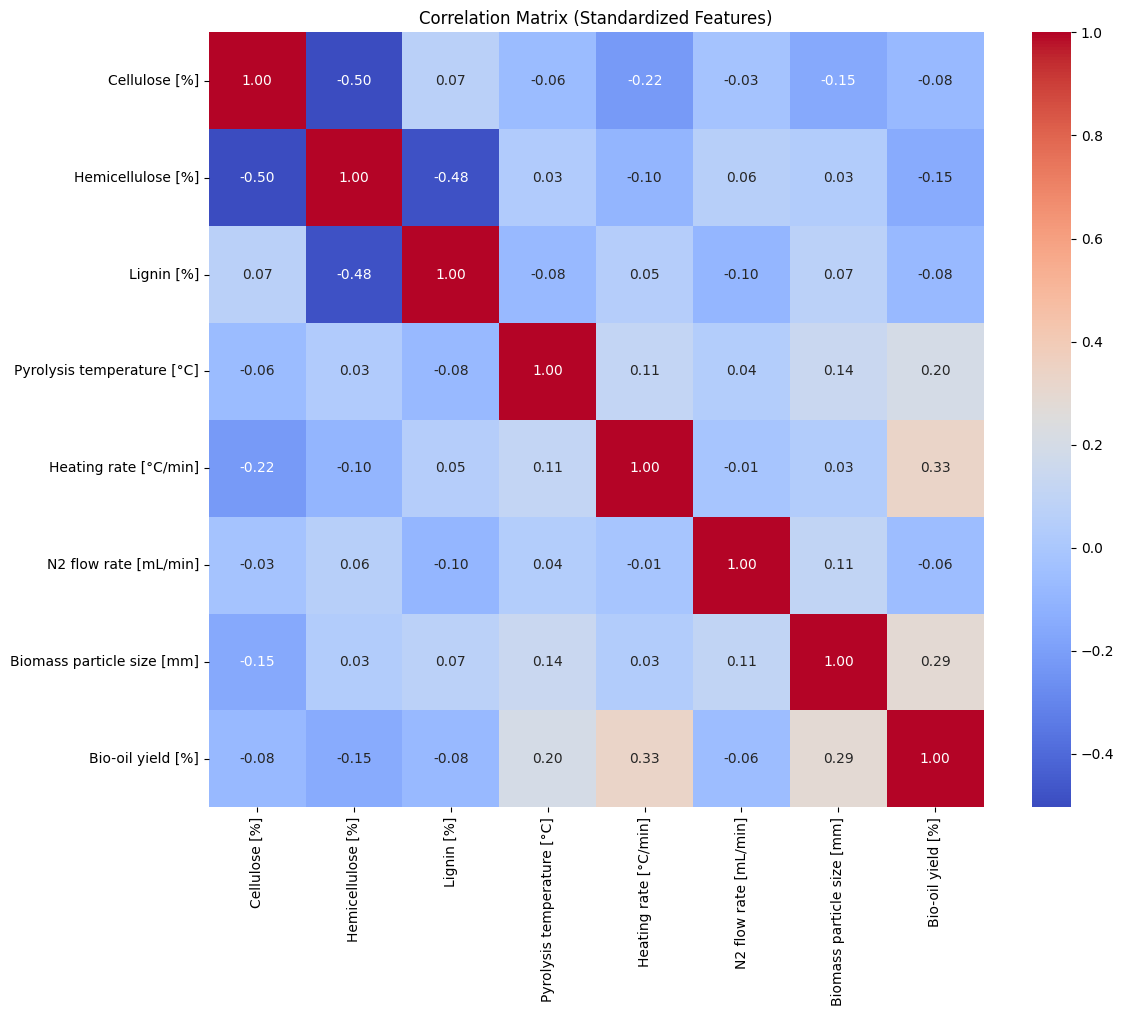

In [65]:
corr_df = sneha_df.drop(columns=['Biomass', 'Origin', 'Type of reactor', 'Reference']).dropna()
corr_scaled = pd.DataFrame(StandardScaler().fit_transform(corr_df), columns=corr_df.columns)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_scaled.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix (Standardized Features)")
plt.tight_layout()
plt.show()

In [66]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(corr_scaled)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
print(pca_df)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio after outlier removal:", explained_variance)

          PC1       PC2       PC3
0   -0.791429  1.315996  0.997604
1   -0.285287  1.146269  0.708714
2    0.748686  1.364704  1.372235
3    0.743187  1.344647  1.354381
4    0.745226  1.348464  1.336211
..        ...       ...       ...
336  3.034213 -0.775248  0.869057
337  2.669343 -0.117129 -2.066111
338  2.996559  0.486958 -1.758323
339  3.146034  0.744238 -1.603837
340  3.471029  1.125143 -1.135209

[341 rows x 3 columns]
Explained Variance Ratio after outlier removal: [0.22349666 0.20260942 0.13573832]


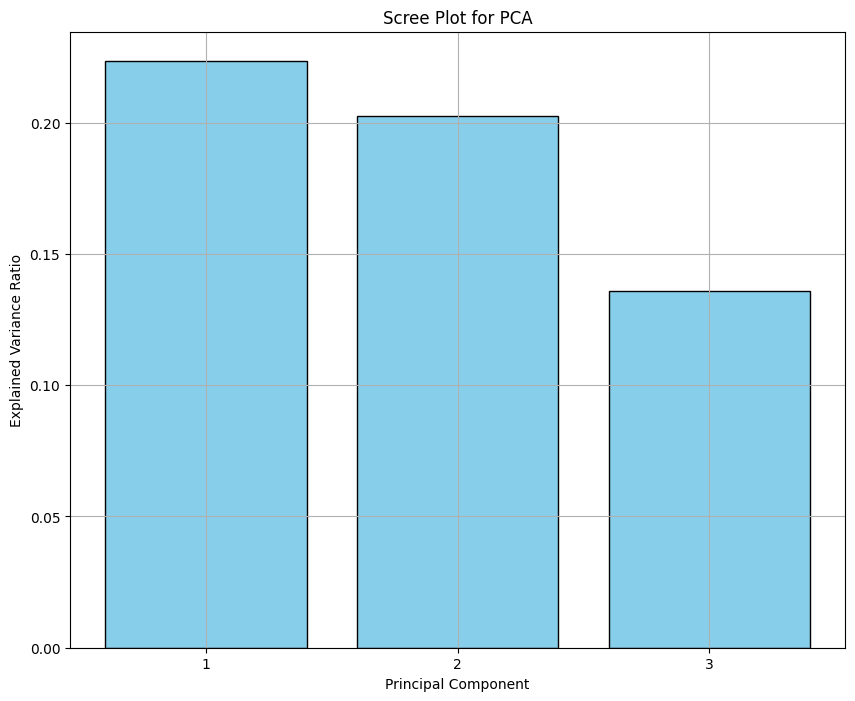

In [67]:
plt.figure(figsize=(10, 8))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue', edgecolor='black')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

C:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


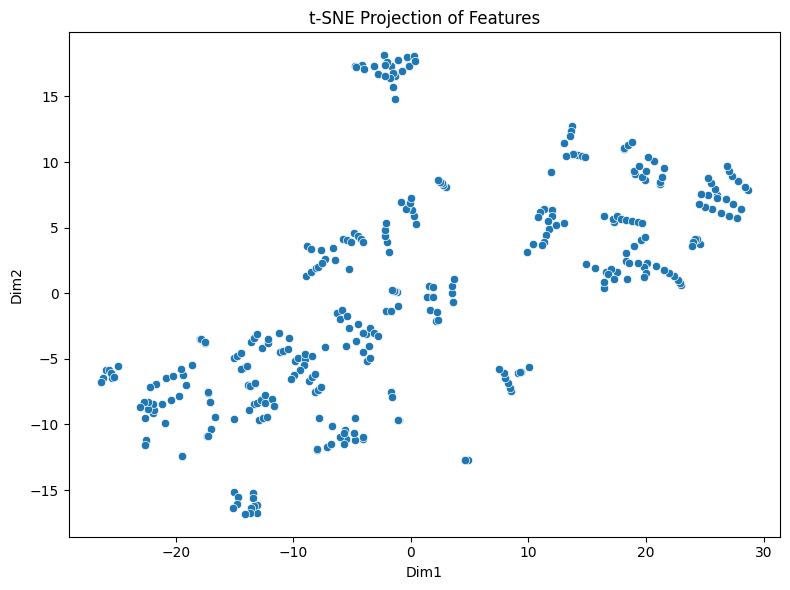

In [68]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_result = tsne.fit_transform(corr_scaled)
tsne_df = pd.DataFrame(tsne_result, columns=['Dim1', 'Dim2'])

plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2')
plt.title("t-SNE Projection of Features")
plt.tight_layout()
plt.show()

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [70]:
def classify_yield(y):
    if y < 30:
        return 'Low'
    elif y < 45:
        return 'Medium'
    else:
        return 'High'

In [71]:
sneha_df['Yield Class'] = sneha_df['Bio-oil yield [%]'].apply(classify_yield)

In [72]:
X_class = sneha_df.drop(columns=['Bio-oil yield [%]', 'Yield Class', 'Reference', 'Origin'])
y_class = sneha_df['Yield Class']
categorical_cols_cls = X_class.select_dtypes(include=['object']).columns.tolist()
numerical_cols_cls = X_class.select_dtypes(include=['float64', 'int64']).columns.tolist()


In [81]:
numeric_transformer_cls = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_transformer_cls = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])
preprocessor_cls = ColumnTransformer([
    ("num", numeric_transformer_cls, numerical_cols_cls),
    ("cat", categorical_transformer_cls, categorical_cols_cls)
])

In [82]:
X_class_processed = preprocessor_cls.fit_transform(X_class)

label_encoder = LabelEncoder()
y_class_encoded = label_encoder.fit_transform(y_class)


In [83]:
from sklearn.model_selection import train_test_split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class_processed, y_class_encoded, test_size=0.2, random_state=42)

In [84]:
lda = LinearDiscriminantAnalysis()
lda.fit(Xc_train, yc_train)
yc_pred = lda.predict(Xc_test)

In [85]:
print("Accuracy:", accuracy_score(yc_test, yc_pred))
print("\nConfusion Matrix:\n", confusion_matrix(yc_test, yc_pred))
print("\nClassification Report:\n", classification_report(yc_test, yc_pred, target_names=label_encoder.classes_))


Accuracy: 0.8115942028985508

Confusion Matrix:
 [[13  0  2]
 [ 0  3  7]
 [ 2  2 40]]

Classification Report:
               precision    recall  f1-score   support

        High       0.87      0.87      0.87        15
         Low       0.60      0.30      0.40        10
      Medium       0.82      0.91      0.86        44

    accuracy                           0.81        69
   macro avg       0.76      0.69      0.71        69
weighted avg       0.80      0.81      0.79        69



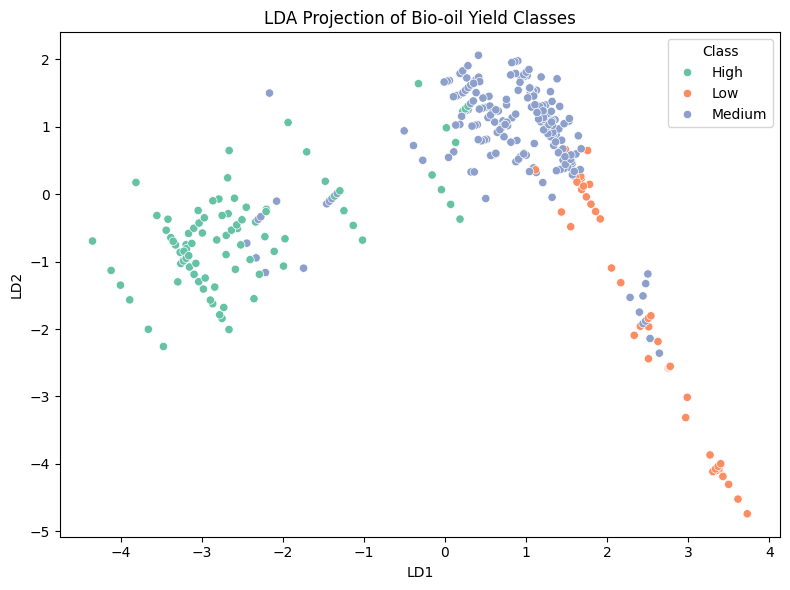

In [86]:
lda_projection = lda.transform(X_class_processed)
lda_df = pd.DataFrame(lda_projection, columns=[f"LD{i+1}" for i in range(lda_projection.shape[1])])
lda_df['Class'] = y_class.values

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue='Class', palette='Set2')
plt.title("LDA Projection of Bio-oil Yield Classes")
plt.tight_layout()
plt.show()

In [89]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [90]:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

In [92]:
X_reg = sneha_df.drop(columns=['Bio-oil yield [%]', 'Reference', 'Origin'])
y_reg = sneha_df['Bio-oil yield [%]']

categorical_cols = X_reg.select_dtypes(include='object').columns.tolist()
numerical_cols = X_reg.select_dtypes(include=['float64', 'int64']).columns.tolist()

preprocessor_ensemble = ColumnTransformer([
    ("num", SimpleImputer(strategy='median'), numerical_cols),
    ("cat", Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), categorical_cols)
])

In [93]:
X_processed = preprocessor_ensemble.fit_transform(X_reg)

In [95]:
print(X_processed)

[[48.44 23.93 27.18 ...  1.    0.    0.  ]
 [42.11 28.03 29.08 ...  1.    0.    0.  ]
 [37.4  31.2  27.5  ...  1.    0.    0.  ]
 ...
 [16.11 44.25  9.2  ...  1.    0.    0.  ]
 [16.11 44.25  9.2  ...  1.    0.    0.  ]
 [16.11 44.25  9.2  ...  1.    0.    0.  ]]


In [94]:
for name, model in models.items():
    scores = cross_val_score(model, X_processed, y_reg, scoring='neg_root_mean_squared_error', cv=5)
    print(f"{name}: RMSE = {-scores.mean():.2f} ± {scores.std():.2f}")

Random Forest: RMSE = 4.97 ± 0.84
Gradient Boosting: RMSE = 4.84 ± 1.02
XGBoost: RMSE = 5.26 ± 0.35


In [110]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import numpy as np

In [111]:
X = sneha_df.drop(columns=['Bio-oil yield [%]', 'Reference', 'Origin'])
y = sneha_df['Bio-oil yield [%]']

categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [112]:
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy='median')),
        ("scaler", StandardScaler())
    ]), numerical_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy='most_frequent')),
        ("onehot", OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), categorical_cols)
])

X_processed = preprocessor.fit_transform(X)

In [113]:
def objective_rf_mse(trial):
    model = RandomForestRegressor(
        n_estimators=trial.suggest_int('n_estimators', 100, 500),
        max_depth=trial.suggest_int('max_depth', 5, 30),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10),
        random_state=42
    )

    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_processed, y, scoring='neg_mean_squared_error', cv=cv)
    return -np.mean(scores)  



In [114]:
study = optuna.create_study(direction='minimize')
study.optimize(objective_rf_mse, n_trials=50)

[I 2025-04-25 16:18:14,885] A new study created in memory with name: no-name-94461bda-e8fa-4b47-b57f-e4931e56d542
[I 2025-04-25 16:18:18,518] Trial 0 finished with value: 9.263571780594772 and parameters: {'n_estimators': 404, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 9.263571780594772.
[I 2025-04-25 16:18:19,536] Trial 1 finished with value: 11.350430269967546 and parameters: {'n_estimators': 131, 'max_depth': 24, 'min_samples_split': 6, 'min_samples_leaf': 7}. Best is trial 0 with value: 9.263571780594772.
[I 2025-04-25 16:18:22,529] Trial 2 finished with value: 12.313727400076196 and parameters: {'n_estimators': 394, 'max_depth': 27, 'min_samples_split': 4, 'min_samples_leaf': 10}. Best is trial 0 with value: 9.263571780594772.
[I 2025-04-25 16:18:25,622] Trial 3 finished with value: 9.612032739995971 and parameters: {'n_estimators': 363, 'max_depth': 23, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 0 with value: 9.2

In [118]:
print("Best Hyperparameters:", study.best_params)
print("Best MSE:", study.best_value)

Best Hyperparameters: {'n_estimators': 464, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best MSE: 7.9437481861156005


In [116]:
import pickle

In [119]:
with open("bio_oil_model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as 'bio_oil_model.pkl'")

Model saved as 'bio_oil_model.pkl'


In [120]:
import pickle


with open("bio_oil_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)


predictions = loaded_model.predict(X_test)

NotFittedError: need to call fit or load_model beforehand